**Descriptive statistics**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('transaction_data.csv')


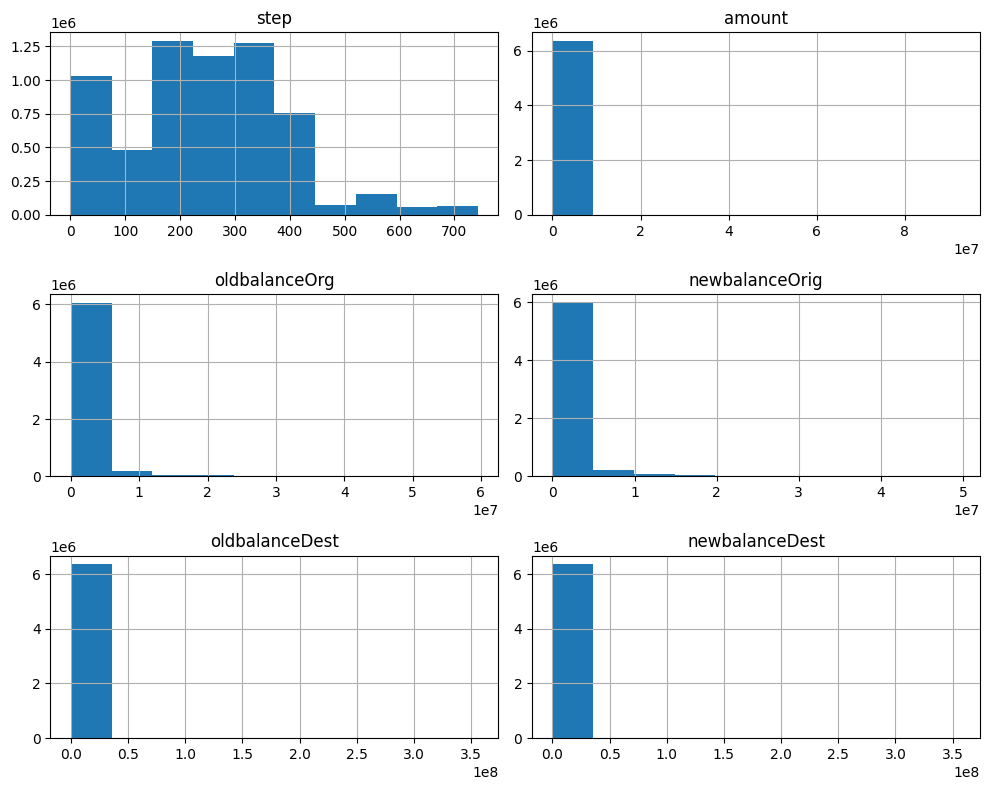

In [3]:
# histograms (numerical)

numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
numerical_data = data[numerical_columns]
numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


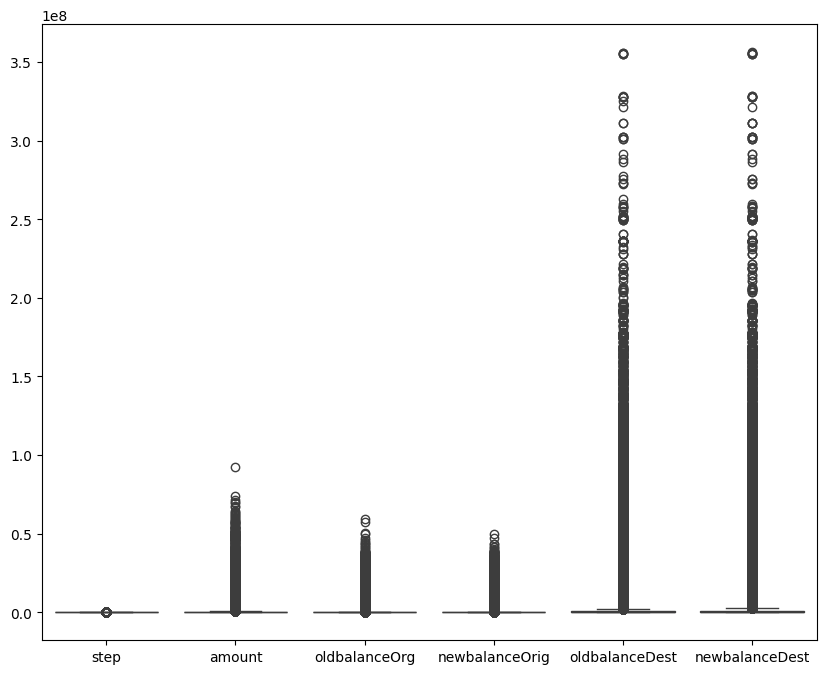

In [4]:
#box plot (numerical)

plt.figure(figsize=(10,8))
sns.boxplot(data=numerical_data)
plt.show()

In [1]:
# matix scatter plot (numerical)

numerical_data_sample = numerical_data.sample(frac=0.2)
print("Sample size: {} ({}%)".format(numerical_data_sample.shape[0], round((numerical_data_sample.shape[0]/data.shape[0])*100,3)))
sns.pairplot(numerical_data_sample)
plt.show()

NameError: name 'numerical_data' is not defined

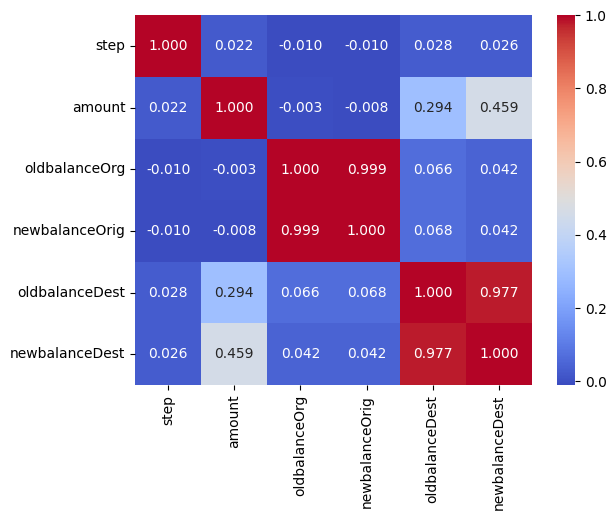

In [ ]:
# correlation matrix (numerical)

corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

1272524


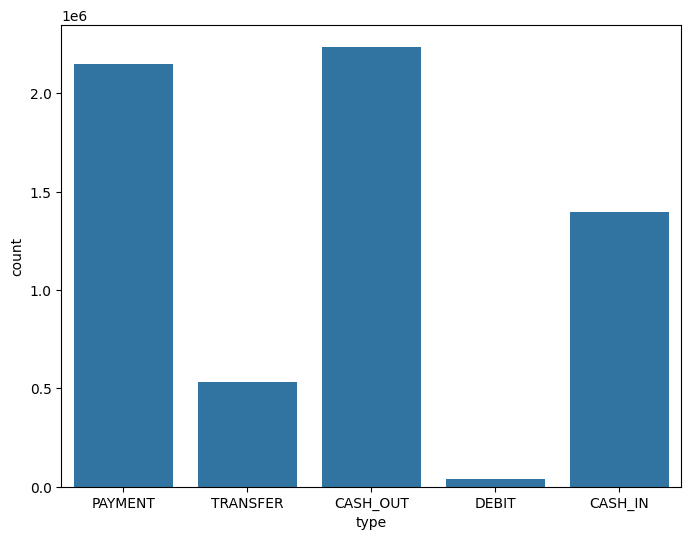

In [ ]:
# bar plot (categorical)

plt.figure(figsize=(8,6))
sns.countplot(x='type', data=data)
plt.show()

# nameOrig and nameDest plots are not informative
# plt.figure(figsize=(8,6))
# sns.countplot(x='nameOrig', data=sampled_data)
# plt.show()

# plt.figure(figsize=(8,6))
# sns.countplot(x='nameDest', data=sampled_data)
# plt.show()


In [ ]:
# labels

num_isFraud = data['isFraud'].sum()
print('isFraud transactions: {} ({}%)'.format(num_isFraud, (num_isFraud/data.shape[0])*100))

num_isFlaggedFraud = data['isFlaggedFraud'].sum()
print('isFlaggedFraud transactions: {} ({}%)'.format(num_isFlaggedFraud, (num_isFlaggedFraud/data.shape[0])*100))

isFraud transactions: 8213 (0.12908204481801522%)
isFlaggedFraud transactions: 16 (0.000251468734577894%)


In [ ]:
# removing outliers (bad option)

numerical_cols = ['amount', 'oldbalanceOrg', 'oldbalanceDest']
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers = data[~outlier_condition]

diff = data.shape[0]-data_no_outliers.shape[0]
print("Data size: {}\nRemoved: {} ({}%)".format(data_no_outliers.shape[0], diff, round((diff/data.shape[0])*100),3))
no_outliers_isFraud = data_no_outliers['isFlaggedFraud'].sum()
print("isFraud transactions in no outliers data: {}".format(no_outliers_isFraud))

Data size: 4468732
Removed: 1893888 (30%)
isFraud transactions in no outliers data: 0


In [ ]:
# normailze data (mean 0, dev 1)
def z_normalize(data):
    mean = data.mean()
    std = data.std()
    normalized_data = (data - mean) / std
    return normalized_data

normalized_data = data.copy()
normalization_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
normalized_data[normalization_cols] = z_normalize(normalized_data[normalization_cols])


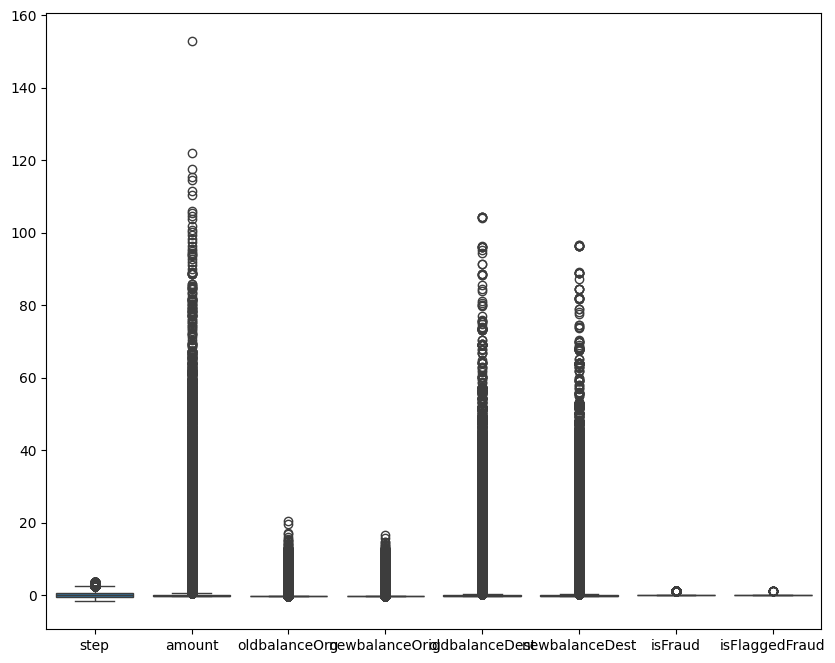

In [ ]:
# box plot of normalized data

plt.figure(figsize=(10,8))
sns.boxplot(data=normalized_data)
plt.show()